# Logistic Regression

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('final_csv_202105132251.csv')
X=dataset

Encoding

In [ ]:
cat_vars= ['grdatn', 'marstat', 'region', 'msastat', 'faminc', 'race', 'class', 'mlr', 'indmaj', 'state']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(X[var], prefix=var)
    data1=X.join(cat_list)
    X=data1
cat_vars= ['grdatn', 'marstat', 'region', 'msastat', 'faminc', 'race', 'class', 'mlr', 'indmaj', 'state']
data_vars=X.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
data_final=X[to_keep]
print(data_final.columns.values)

['natvty' 'female' 'immigr' 'vet' 'age' 'hours' 'ent' 'grdatn_1'
 'grdatn_2' 'grdatn_3' 'marstat_1' 'marstat_2' 'region_1' 'region_2'
 'region_3' 'region_4' 'msastat_1' 'msastat_2' 'faminc_1' 'faminc_2'
 'faminc_3' 'faminc_4' 'faminc_5' 'faminc_6' 'faminc_7' 'faminc_8'
 'faminc_9' 'faminc_10' 'race_1' 'race_2' 'race_3' 'race_4' 'race_5'
 'race_6' 'race_7' 'class_1' 'class_2' 'class_3' 'class_4' 'class_5'
 'class_6' 'class_7' 'class_8' 'mlr_1' 'mlr_2' 'mlr_3' 'mlr_4' 'mlr_5'
 'mlr_6' 'mlr_7' 'indmaj_1' 'indmaj_2' 'indmaj_3' 'indmaj_4' 'indmaj_5'
 'indmaj_6' 'indmaj_7' 'indmaj_8' 'indmaj_9' 'indmaj_10' 'indmaj_11'
 'indmaj_12' 'indmaj_13' 'indmaj_14' 'state_11' 'state_12' 'state_14'
 'state_15' 'state_16' 'state_21' 'state_22' 'state_23' 'state_31'
 'state_32' 'state_33' 'state_34' 'state_35' 'state_41' 'state_42'
 'state_43' 'state_46' 'state_47' 'state_52' 'state_53' 'state_54'
 'state_56' 'state_57' 'state_58' 'state_59' 'state_61' 'state_62'
 'state_63' 'state_64' 'state_71' 'state_7

In [ ]:
print(data_final.head())

   natvty  female  immigr  vet  ...  state_91  state_92  state_93  state_95
0       1       1       0    0  ...         0         0         0         0
1       1       1       0    0  ...         0         0         0         0
2       1       0       0    0  ...         0         0         0         0
3       1       1       0    0  ...         0         0         0         0
4       0       0       0    0  ...         0         0         0         0

[5 rows x 107 columns]


## Splitting the dataset into the Training set and Test set

In [ ]:
X = data_final.loc[:, data_final.columns != 'ent']
y = data_final.loc[:, data_final.columns == 'ent']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
print(X_train)

        natvty  female  immigr  vet  ...  state_91  state_92  state_93  state_95
195141       1       1       0    0  ...         0         0         0         0
318940       0       1       1    0  ...         0         0         0         0
197610       1       1       0    0  ...         0         0         0         0
24499        0       1       1    0  ...         0         0         0         0
159827       1       1       0    0  ...         0         0         1         0
...        ...     ...     ...  ...  ...       ...       ...       ...       ...
152315       1       0       0    0  ...         0         0         0         0
439107       1       1       0    0  ...         1         0         0         0
117952       1       1       0    0  ...         0         1         0         0
435829       0       0       1    0  ...         0         0         0         0
305711       1       0       0    0  ...         1         0         0         0

[330397 rows x 106 columns]

In [ ]:
print(y_train)

        ent
195141    0
318940    0
197610    0
24499     0
159827    0
...     ...
152315    0
439107    0
117952    0
435829    0
305711    0

[330397 rows x 1 columns]


In [ ]:
print(X_test)

        natvty  female  immigr  vet  ...  state_91  state_92  state_93  state_95
315955       1       0       0    0  ...         0         0         0         0
324135       1       1       0    0  ...         0         0         0         0
299282       1       0       0    0  ...         0         0         1         0
345997       1       0       0    0  ...         0         0         0         0
145621       1       0       0    0  ...         0         0         0         0
...        ...     ...     ...  ...  ...       ...       ...       ...       ...
260920       0       1       1    0  ...         0         0         0         0
23950        0       0       1    0  ...         0         0         0         0
6436         1       1       0    0  ...         0         0         0         0
127195       1       1       0    0  ...         0         0         0         0
20197        1       1       0    0  ...         0         0         0         0

[110133 rows x 106 columns]

In [ ]:
print(y_test)

        ent
315955    0
324135    0
299282    0
345997    0
145621    0
...     ...
260920    0
23950     0
6436      0
127195    0
20197     0

[110133 rows x 1 columns]


## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
X_train[:,4:6] = sc.fit_transform(X_train[:,4:6])
X_test[:,4:6] = sc.transform(X_test[:,4:6])

In [ ]:
print(X_train[0:11, 4:6])

[[-1  0]
 [ 0  0]
 [ 0  0]
 [ 0  0]
 [ 0  0]
 [-1  1]
 [ 0 -1]
 [ 0  0]
 [ 1 -2]
 [ 0  0]
 [ 1  0]]


In [ ]:
print(X_test)

[[1 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [1 0 0 ... 0 1 0]
 ...
 [1 1 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]]


SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
#columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
X_train = pd.DataFrame(data=os_data_X, )
y_train = pd.DataFrame(data=os_data_y,columns=['ent'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(X_train))
print("Number of no subscription in oversampled data",len(y_train[y_train['ent']==0]))
print("Number of subscription",len(y_train[y_train['ent']==1]))
print("Proportion of no subscription data in oversampled data is ",len(y_train[y_train['ent']==0])/len(X_train))
print("Proportion of subscription data in oversampled data is ",len(y_train[y_train['ent']==1])/len(X_train))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


length of oversampled data is  657844
Number of no subscription in oversampled data 328922
Number of subscription 328922
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


## Training the Logistic Regression model on the Training set

In [ ]:
from sklearn.tree import DecisionTreeClassifier
y_train = y_train.to_numpy()
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train.ravel())

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

## Predicting the Test set results

In [ ]:
y_test = y_test.to_numpy()
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[109642      8]
 [     4    479]]


0.9998910408324481

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    109650
           1       0.98      0.99      0.99       483

    accuracy                           1.00    110133
   macro avg       0.99      1.00      0.99    110133
weighted avg       1.00      1.00      1.00    110133



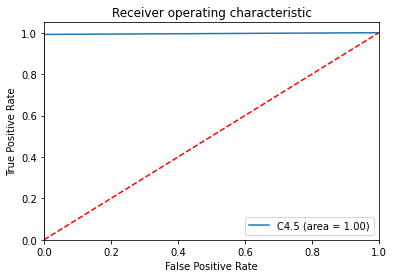

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='C4.5 (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()